#   Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import scipy.stats as stats
from sklearn.metrics import accuracy_score
rcParams['figure.figsize'] = 25,5

In [90]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

## Оновные метрики через describe():

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Здесь представлены:                   
1 - <span class="girk">Среднее</span> каждого параметра                  
2 - <span class="girk">Максимальное</span> и <span class="girk">минимальное</span> значения каждого параметра                    
3 - Квантили. И квантиль 50% - это <span class="girk">медиана</span>

## Мода каждого параметра:

In [6]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


У параметра "average_montly_hours" сразу 2 моды

# Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

Оставим в наборе лишь количественные переменные

In [8]:
data_quant = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

Построим <span class="girk">pairplot</span> для визуального осмотра количественных переменных

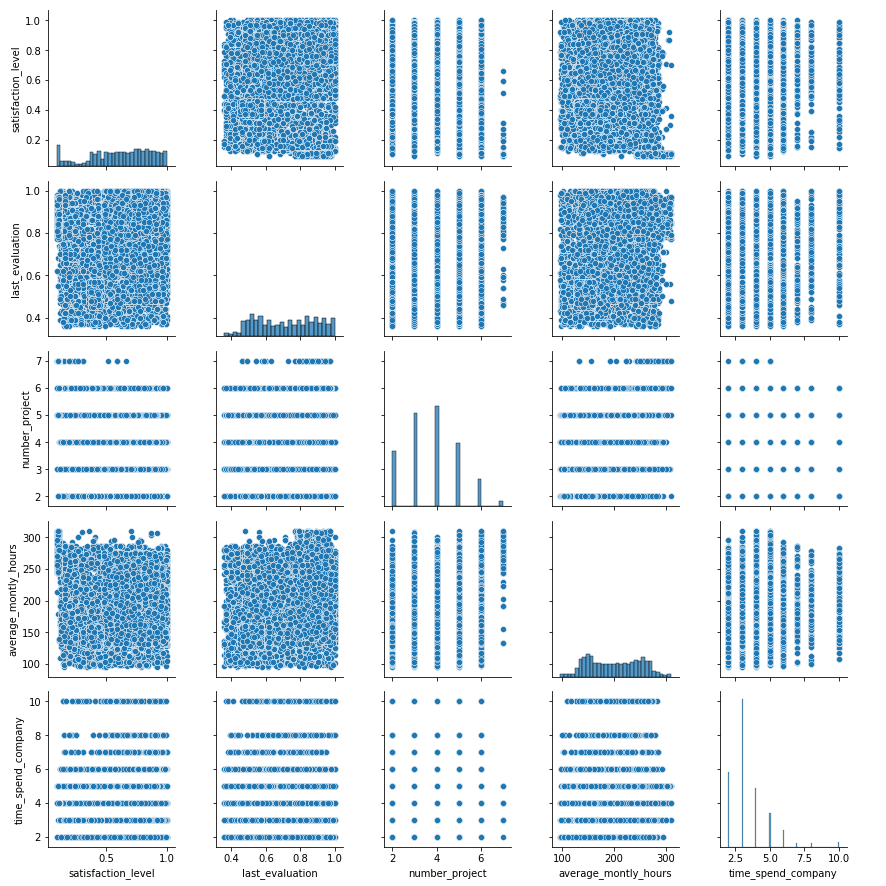

In [9]:
sns.pairplot(data_quant)

С виду не видно какой-либо зависимости между параметрами. Построим матрицу корреляции методом Спирмена.

In [10]:
data_quant.corr(method="spearman").style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1,0.162407,0.00578584,0.0619996,-0.139428
last_evaluation,0.162407,1,0.350399,0.342061,0.161154
number_project,0.00578584,0.350399,1,0.397855,0.251971
average_montly_hours,0.0619996,0.342061,0.397855,1,0.16875
time_spend_company,-0.139428,0.161154,0.251971,0.16875,1


По таблице с коэффициентами корреляции можно заметить:                        

1 - Прямая связь переменной <span class="mark">"number_project"</span> с <span class="mark">"last_evaluation"</span>, <span class="mark">"average_montly_hours"</span> и <span class="mark">"time_spend_company"</span>                    
2 - Прямая связь <span class="mark">"average_montly_hours"</span> и <span class="mark">"last_evaluation"</span>

А вот переменна "satisfaction_level" имеет почти нулевую корреляцию с <span class="mark">"number_project"</span> и	<span class="mark">"average_montly_hours"</span>

Если посмотреть значение каждого параметра, то логически прослеживаются связи:

1 - Чем больше человек работает в неделю, тем больше проектов он может сделать и, соответственно, тем выше его стаж в данной компании                  

2 - "last_evaluation" - время последнего повышения. Согласно данной таблице, чем больше прошло время с последней оценки, тем больше работают люди в неделю, что вытекает в большее количество выполненных проектов                        
3 - Чем ниже уровень удовлетворенности рабоой, тем ниже мотивация работать больше и, соответственно, выполнять больше проектов. Но так как корреляция отсутвует, можно предположить, что часть неудовлетворенных работой людей работают мало и непродуктивно, а другая часть вынуждена работать больше. Поэтому и нет корреляции между данными переменными

# Рассчитайте сколько сотрудников работает в каждом департаменте.

In [91]:
department = data.groupby(by='department')['number_project'].count().reset_index()
department

,department,number_project
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


Text(0.5, 1.0, 'Распределение опрошенных по сфере деятельности')

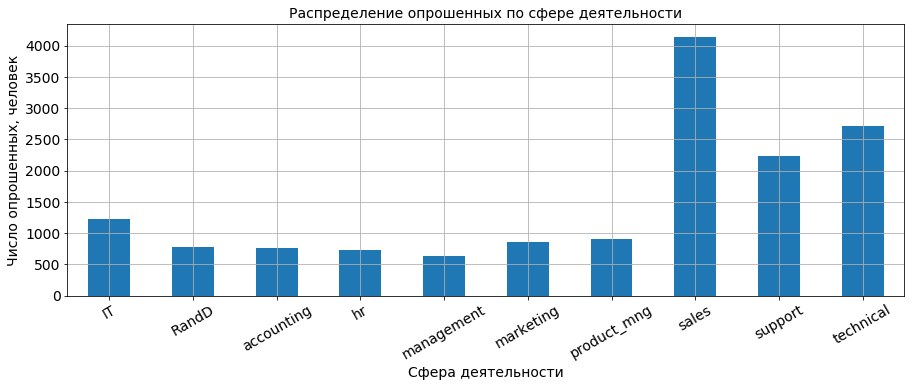

In [13]:
department.plot(kind='bar',
               grid=True,
               fontsize=14,
               rot=30,
               figsize=(15,5)
               )

plt.xlabel('Сфера деятельности', fontsize=14)
plt.ylabel('Число опрошенных, человек', fontsize=14)
plt.title('Распределение опрошенных по сфере деятельности', fontsize=14)

In [95]:
department['number_project'].nsmallest(2)

4    630
3    739
Name: number_project, dtype: int64

Большее чило опрошенных занято в сфере продаж, технической отрасли и в службе поддержки. Меньше всего в менеджменте и в качестве персонала компании.

# Показать распределение сотрудников по зарплатам.

Text(0.5, 1.0, 'Распределение опрошенных по величине зарплаты')

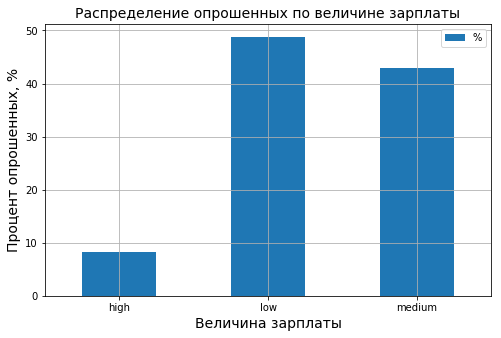

In [15]:
salary = data.groupby(by='salary')['number_project'].count()
salary = pd.DataFrame(salary).rename(columns={'number_project': '%'})
salary['%'].astype('int64')
salary['%'] = round(salary['%'] / salary['%'].sum() * 100, 2)

salary.plot(kind='bar',
           grid=True,
           rot=0,
           figsize=(8,5)
           )
plt.xlabel('Величина зарплаты', fontsize=14)
plt.ylabel('Процент опрошенных, %', fontsize=14)
plt.title('Распределение опрошенных по величине зарплаты', fontsize=14)

Как видно из графика выше, подавляющее большинство опрошенных имеют уровень заработка не выше среднего. Проверим стаж опрошенных:

Text(0.5, 1.0, 'Распределение опрошенных по стажу')

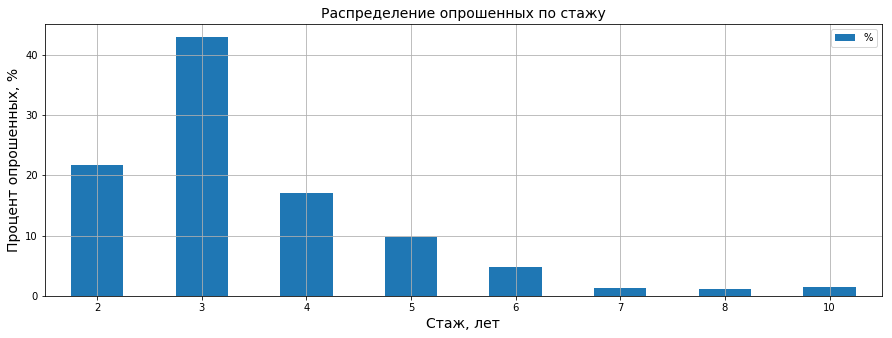

In [16]:
time_spend = data.groupby(by='time_spend_company')['number_project'].count()
time_spend = pd.DataFrame(time_spend).rename(columns={'number_project': '%'})
time_spend['%'].astype('int64')
time_spend['%'] = round(time_spend['%'] / time_spend['%'].sum() * 100, 2)

time_spend.plot(kind='bar',
           grid=True,
           rot=0,
           figsize=(15,5)
           )

plt.xlabel('Стаж, лет', fontsize=14)
plt.ylabel('Процент опрошенных, %', fontsize=14)
plt.title('Распределение опрошенных по стажу', fontsize=14)

Сравнивая одновременно распределение зарплат и стаж опрошенных, можно сделать заключение, что стаж больше 60% респондентов не превышает 3-х лет, что явно мало для должностей с высоким окладом. Поэтому более 90% программистов имеют заработок не выше среднего.

# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [17]:
dep = data.groupby(['department'])['salary'].value_counts(normalize=True)
dep = pd.DataFrame(dep).rename(columns={'salary': '%'}).reset_index()
dep['%'] = dep['%'] * 100
dep.head(9)

,department,salary,%
0,IT,low,49.633252
1,IT,medium,43.602282
2,IT,high,6.764466
3,RandD,medium,47.268107
4,RandD,low,46.251588
5,RandD,high,6.480305
6,accounting,low,46.675359
7,accounting,medium,43.676662
8,accounting,high,9.647979


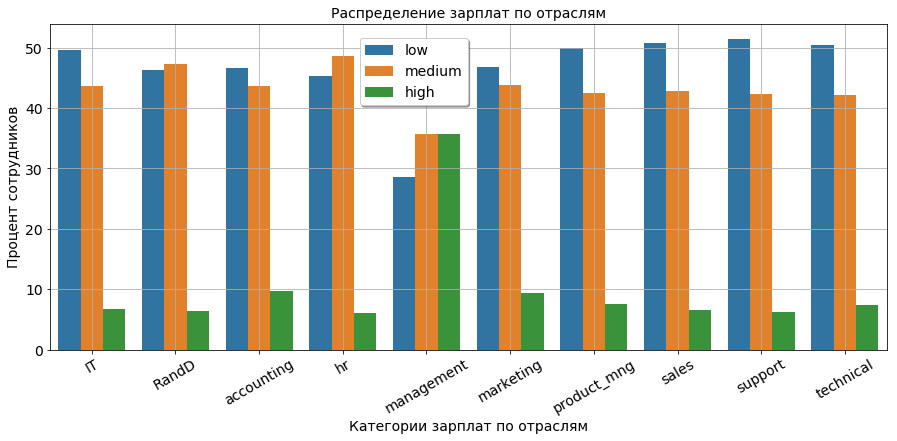

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

sns.barplot(
    x="department", 
    y="%", 
    hue="salary",
    ci=None,
    data=dep
)
plt.grid()
plt.xlabel('Категории зарплат по отраслям', fontsize=14)
plt.ylabel('Процент сотрудников', fontsize=14)
plt.title('Распределение зарплат по отраслям', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='x', rotation=30)
# plt.legend(bbox_to_anchor=(1, 0.6))
plt.legend(fontsize=14, loc=(0.37, 0.75), shadow=True)


Почти во всех отраслях у респондентов зарплата относится к категории "низкая". Заметное отличие наблюдается в сфере менеджмента, где зарплаты среднего и высокого уровня. Логично предположить, что управленческая деятельность хорошо оплачивается, так как является очень ответственной.

# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

- H0 - уровень зарплаты не зависит от числа рабочих часов в неделю
- Н1 - чем выше оклад, тем больше времени проводит на работе сотрудник

Уровень значимости возьмем 5%

In [36]:
rcParams['figure.figsize'] = 10,5

low_salary = data.loc[data['salary'] == 'low', 'average_montly_hours']
high_salary = data.loc[data['salary'] == 'high', 'average_montly_hours']

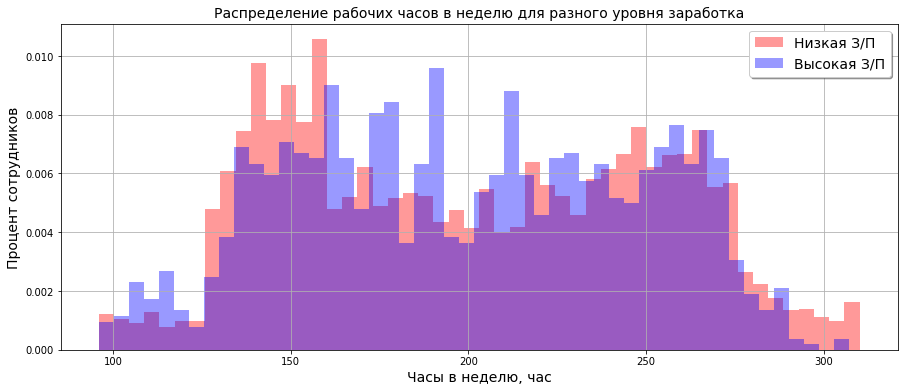

In [50]:
plt.hist(low_salary, alpha =0.4, density=True, bins=50, color='red')
plt.hist(high_salary, alpha =0.4, density=True, bins=50, color='blue')
plt.grid()
plt.title('Распределение рабочих часов в неделю для разного уровня заработка', fontsize=14)
plt.xlabel('Часы в неделю, час', fontsize=14)
plt.ylabel('Процент сотрудников', fontsize=14)
plt.legend(['Низкая З/П', 'Высокая З/П'], fontsize=14, shadow=True)

Сразу видно, что данные распределены ненормально, поэтомоу вместо Т-критерия будем искать критерий Манна-Уитни.          

Есть две области подъема у людей с малым заработком - в области 150 часов в неделю и в районе 250 часов в неделю. Меньшее количество человек работает примерно 200 часов в неделю.

У людей с высоким заработком наблюдаются всплески в диапазоне 150 - 220 часов в неделю.

Проверим справедливаость гипотезы.

In [51]:
stat, p_value = stats.mannwhitneyu(low_salary, high_salary)
print(f'Критерйи Манна-Уитни: {stat}\np_value: {p_value}')

if p_value > 0.05:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Критерйи Манна-Уитни: 4507096.5
p_value: 0.4120665360429347
Одинаковые распределения (не отвергаем H0)


Результат теста показал, что на уровне значимости 0.05 нет оснований отвергнуть Н0 гипотезу. Значит, что респонденты работают примерно одинаковое количество времени, а зарплата складывается из других критериев .

# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет                 
● Средняя степень удовлетворенности                              
● Среднее количество проектов

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<span class="mark">Уволившиеся работники:</span>

In [23]:
# Число тех, кто уволился, но был повышен в должности за последние 5 лет
amount = data.loc[(data['left'] == 1) & (data['promotion_last_5years'] == 1), 'promotion_last_5years'].count()
percentage = round(amount / data.loc[data['left'] == 1, 'promotion_last_5years'].count() * 100, 2)
print(f'- Процент получивших повышение за последние 5 лет среди уволившихся: {percentage} %')

mean_satisfaction_level = round(data.loc[data['left'] == 1, 'satisfaction_level'].mean(), 2)
print(f'- Средний уровень удовлетворенности среди уволившихся составляет: {mean_satisfaction_level}')

mean_number_project = round(data.loc[data['left'] == 1, 'number_project'].mean(),2)
print(f'- Среднее число проектов среди уволившихся составляет: {mean_number_project}')

mean_number_project = round(data.loc[data['left'] == 1, 'average_montly_hours'].mean(),2)
print(f'- Среднее число рабочих часов в месяц среди уволившихся составляет: {mean_number_project}')

- Процент получивших повышение за последние 5 лет среди уволившихся: 0.53 %
- Средний уровень удовлетворенности среди уволившихся составляет: 0.44
- Среднее число проектов среди уволившихся составляет: 3.86
- Среднее число рабочих часов в месяц среди уволившихся составляет: 207.42


<span class="mark">Неуволившиеся работники:</span>

In [24]:
# Число тех, кто уволился, но был повышен в должности за последние 5 лет
amount = data.loc[(data['left'] == 0) & (data['promotion_last_5years'] == 1), 'promotion_last_5years'].count()
percentage = round(amount / data.loc[data['left'] == 0, 'promotion_last_5years'].count() * 100, 2)
print(f'- Процент получивших повышение за последние 5 лет среди неуволившихся: {percentage} %')

mean_satisfaction_level = round(data.loc[data['left'] == 0, 'satisfaction_level'].mean(), 2)
print(f'- Средний уровень удовлетворенности среди неуволившихся составляет: {mean_satisfaction_level}')

mean_number_project = round(data.loc[data['left'] == 0, 'number_project'].mean(),2)
print(f'- Среднее число проектов среди неуволившихся составляет: {mean_number_project}')

mean_number_project = round(data.loc[data['left'] == 0, 'average_montly_hours'].mean(),2)
print(f'- Среднее число рабочих часов в месяц среди неуволившихся составляет: {mean_number_project}')

- Процент получивших повышение за последние 5 лет среди неуволившихся: 2.63 %
- Средний уровень удовлетворенности среди неуволившихся составляет: 0.67
- Среднее число проектов среди неуволившихся составляет: 3.79
- Среднее число рабочих часов в месяц среди неуволившихся составляет: 199.06


Анализируя полученные результаты, можно прийти к выводу, что среди уволившихся уровень удовлетворенности своей работой был на 20% ниже, чем у тех, кто не уолился. Такой низкий уровень мог быть связан с тем, что работников редко повышали в должности (0.53% против 2.63% у неуволившихся), а также с тем, что работать приходилось им несколько больше (в среднем на 8 часов в месяц), что выливалось в большее число выполненных рабочих проектов.

# Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую,  уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [53]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
# Сформируем независимую переменную Х и зависимую У
x = data.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
y = data.iloc[:, 6] 

In [89]:
# Разделяем данные на обучающую и тестовую выборки. Так как данных много, то поделим их в отношении 1/3 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=100)

# Созжаем модель LDA, обучаем на тренировочном наборе данных, предсказываем значение Y на тестовом наборе Х
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predict = lda.predict(x_test)

print(f'Точность модели составляет: {round(accuracy_score(y_test, y_predict), 2) * 100}%')

Точность модели составляет: 76.0%


Получается, в 3-х случаях из 4-х наша модель сможет дать правильный ответ на вопрос "Объясняют ли имеющиеся параметры причину увольнения респондента?"